# Week 10 Exercises (12-1, 12-2)

## Exercise 12-1
The linear model I used in this chapter has the obvious drawback that it is linear, and
there is no reason to expect prices to change linearly over time. We can add flexibility
to the model by adding a quadratic term, as we did in “Nonlinear Relationships” on
page 133.

Use a quadratic model to fit the time series of daily prices, and use the model to generate
predictions. You will have to write a version of RunLinearModel that runs that quadratic
model, but after that you should be able to reuse code in timeseries.py to generate
predictions.

In [9]:
import timeseries
import pandas
import statsmodels.formula.api as smf
import regression
import thinkplot
import thinkstats2
import numpy as np

transactions = pandas.read_csv('mj-clean.csv', parse_dates=[5])
dailies = timeseries.GroupByQualityAndDay(transactions)

In [3]:
# Quadratic version of RunLinear Model from text
def RunQuadraticModel(daily):
    daily['years2'] = daily.years ** 2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results

In [4]:
# summarizing results of Quadratic Model
for name, daily in dailies.items():
    model, results = RunQuadraticModel(daily)
    print("\n", name)
    regression.SummarizeResults(results)


 high
Intercept   13.7   (0)
years   -1.12   (5.86e-38)
years2   0.113   (4.82e-07)
R^2 0.4553
Std(ys) 1.096
Std(res) 0.809

 low
Intercept   4.71   (1.5e-54)
years   1.63   (5.33e-06)
years2   -0.294   (0.00204)
R^2 0.03742
Std(ys) 3.381
Std(res) 3.318

 medium
Intercept   8.35   (0)
years   1.15   (4.31e-18)
years2   -0.239   (9.64e-12)
R^2 0.08495
Std(ys) 1.304
Std(res) 1.248


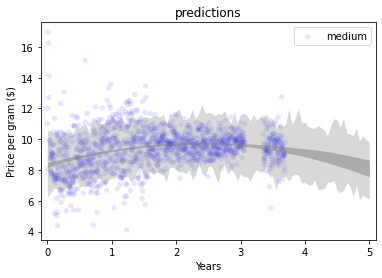

In [5]:
# plotting time series
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
timeseries.PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(
    title="predictions",
    xlabel="Years",
    xlim=[years[0] - 0.1, years[-1] + 0.1],
    ylabel="Price per gram ($)",
)

## Exercise 12-2
Write a definition for a class named SerialCorrelationTest that extends
HypothesisTest from “HypothesisTest” on page 102. It should take a series and a lag
as data, compute the serial correlation of the series with the given lag, and then compute
the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant.
Also test the residuals of the linear model and (if you did the previous exercise),
the quadratic model.

In [6]:
# hypothesis test that runs serial correlation and computes p value
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        series, lag = data
        permutation = series.reindex(np.random.permutation(series.index))
        test_stat = abs(thinkstats2.SerialCorr(series, lag))
        return test_stat
    def RunModel(self):
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [14]:
# testing the high quality data set
name = 'high'
daily = dailies[name]
series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.4852293761947381 0.0


In [15]:
# running the test for residuals
model, results = timeseries.RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.07570473767506261 0.008


In [16]:
# running test for quadratic model
model, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.0560730816128992 0.048
